In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 📚 assignments

## assignment 1
Dataframe Formatting

In [2]:
hotels = pd.read_excel('./data/HotelCustomersDataset.xlsx')

hotels['date'] = (
    pd.to_datetime('2018-12-31')
    - pd.to_timedelta(hotels['DaysSinceCreation'], unit='D')
).astype('datetime64[ns]')

daily_revenue = (
    hotels
    .groupby('date')
    .agg({'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'})
)
monthly_revenue = daily_revenue.resample('M').sum()
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


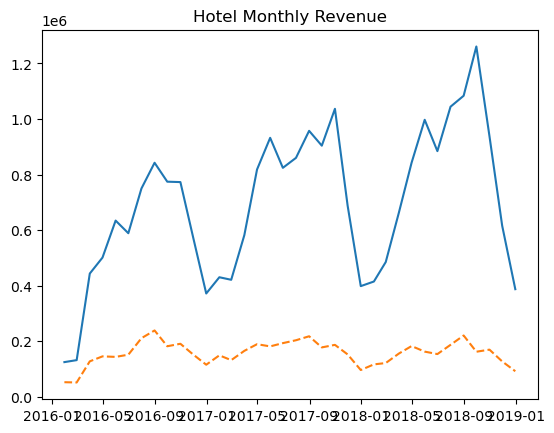

In [3]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'])
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'], linestyle='--')
ax.set_title('Hotel Monthly Revenue');

## assignment 2
Chart Formatting

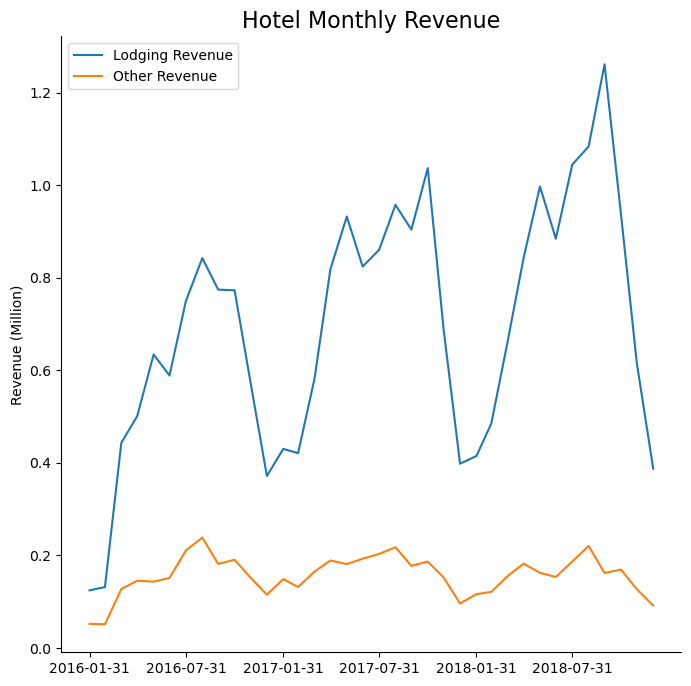

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(
    monthly_revenue.index,
    monthly_revenue['LodgingRevenue'] / 1000000,
    label='Lodging Revenue'
)

ax.plot(
    monthly_revenue.index,
    monthly_revenue['OtherRevenue'] / 1000000,
    label='Other Revenue'
)

ax.legend(loc='upper left')

ax.set_title('Hotel Monthly Revenue', fontsize=16)
ax.set_ylabel('Revenue (Million)')
ax.set_xticks(monthly_revenue.index[::6])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

## assignment 3
Dual Axis Chart

In [5]:
room_nights = hotels.groupby('date').agg({
    'RoomNights': 'sum',
    'BookingsCanceled': 'sum'
})
quarterly_bookings = room_nights.resample('Q').sum()

In [6]:
room_nights.head()

,RoomNights,BookingsCanceled
date,,
2016-01-01,147,0
2016-01-02,170,0
2016-01-03,217,0
2016-01-04,38,0
2016-01-05,211,0


In [7]:
quarterly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


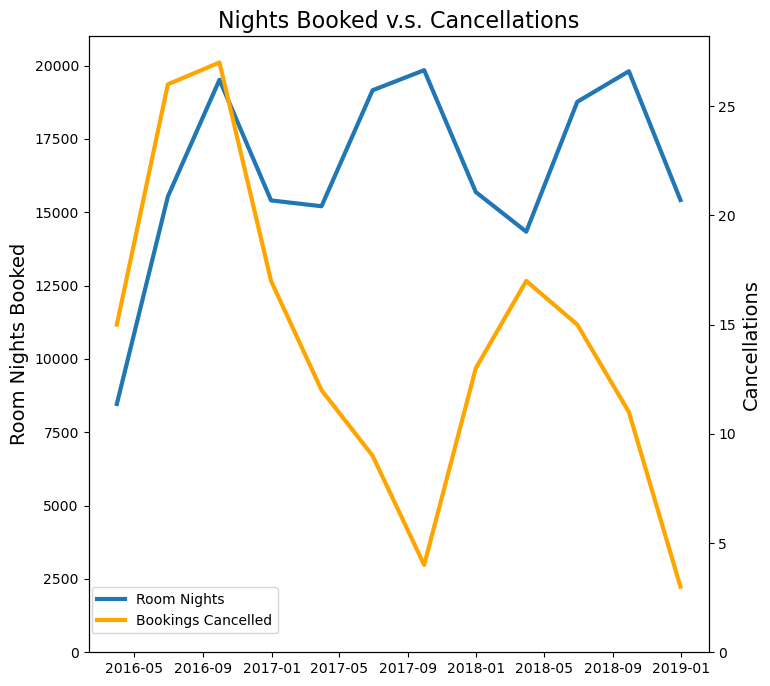

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(
    quarterly_bookings.index,
    quarterly_bookings['RoomNights'],
    label='Room Nights',
    linewidth=3
)
ax.set_title('Nights Booked v.s. Cancellations', fontsize=16)
ax.set_ylabel('Room Nights Booked', fontsize=14)
ax.set_ylim(0, 21000)

ax2 = ax.twinx()

ax2.plot(
    quarterly_bookings.index,
    quarterly_bookings['BookingsCanceled'],
    label='Bookings Cancelled',
    color='orange',
    linewidth=3
)
ax2.set_ylabel('Cancellations', fontsize=14)
ax2.set_ylim(0)

fig.legend(bbox_to_anchor=(.37, .2));

## assignment 4
- Bar Chart: of total room nights booked by 10 countries
- Horizontal Bar Chart: of lodging revenue by 10 same countries

In [9]:
hotels_by_countries = (
    hotels
    .groupby('Nationality')
    .agg({'RoomNights': 'sum', 'LodgingRevenue': 'sum'})
    .sort_values('RoomNights', ascending=False)
    .iloc[:10]
)

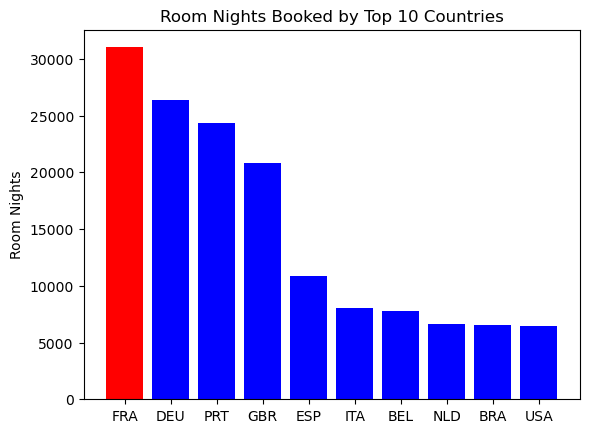

In [10]:
# 1. Bar Chart
colors = ['red'] + ['blue']*9

fig, ax = plt.subplots()

ax.bar(
    hotels_by_countries.index,
    hotels_by_countries['RoomNights'],
    color=colors
)

ax.set_title('Room Nights Booked by Top 10 Countries')
ax.set_ylabel('Room Nights');

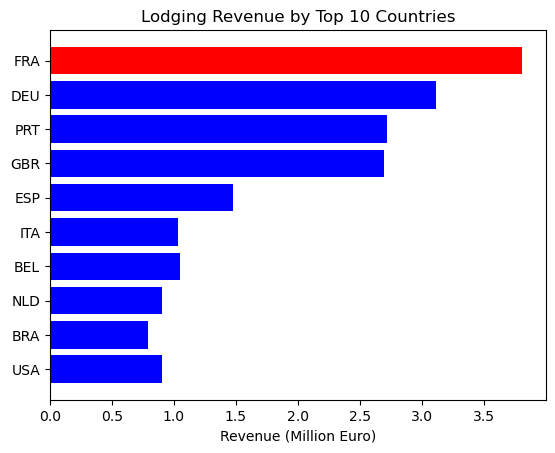

In [11]:
# 2. Horizontal Bar Chart
fig, ax = plt.subplots()

ax.barh(
    hotels_by_countries.index[::-1],
    hotels_by_countries['LodgingRevenue'][::-1] / 1000000,
    color=colors[::-1]
)

ax.set_title('Lodging Revenue by Top 10 Countries')
ax.set_xlabel('Revenue (Million Euro)');

## assignment 5
- Grouped Bar Chart: of Lodging Revenue and Other Revenues by 5 countries
- 100% Stacked Bar Chart (reference line at 80%)

In [12]:
countries = ['FRA', 'DEU', 'PRT', 'GBR', 'ESP']

target = (
    hotels
    .loc[hotels['Nationality'].isin(countries)]
    .groupby('Nationality')
    .agg({'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'})
    .sort_values('LodgingRevenue', ascending=False)
)
target

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


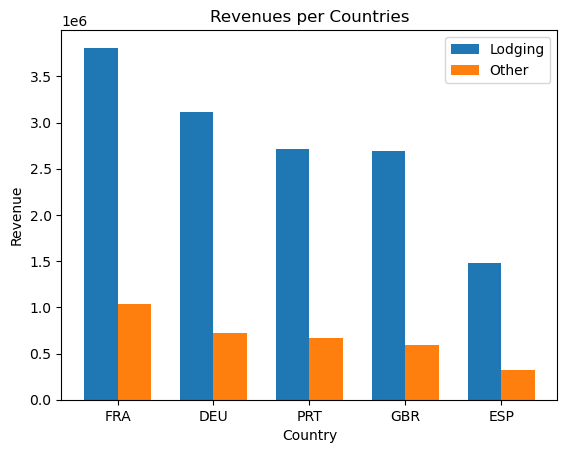

In [13]:
# 1. Grouped Bar Charts (matplotlib)
fig, ax = plt.subplots()

x = np.arange(len(countries))
width = .35

ax.bar(
    x-width/2,
    target['LodgingRevenue'],
    width,
    label='Lodging'
)
ax.bar(
    x+width/2,
    target['OtherRevenue'],
    width,
    label='Other'
)

ax.set_title('Revenues per Countries')
ax.set_ylabel('Revenue')
ax.set_xlabel('Country')

ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries)

ax.legend();

In [14]:
# 2. 100% Stacked Bar Charts
target_pct = target.apply(lambda x: x * 100 / sum(x), axis=1)
target_pct

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471
DEU,81.100394,18.899606
PRT,80.310417,19.689583
GBR,81.999019,18.000981
ESP,82.189013,17.810987


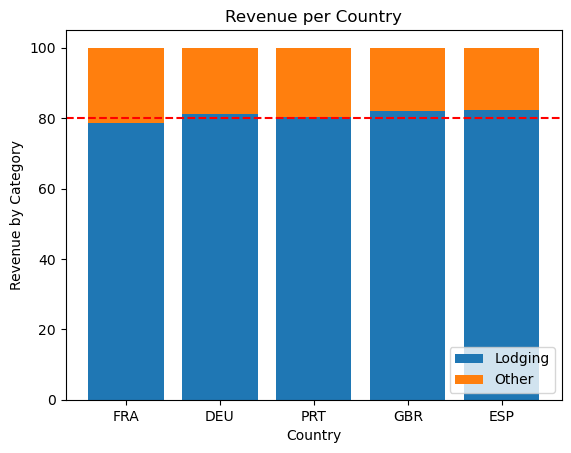

In [15]:
fig, ax = plt.subplots()

ax.bar(
    countries,
    target_pct['LodgingRevenue'],
    label='Lodging'
)
ax.bar(
    countries,
    target_pct['OtherRevenue'],
    label='Other',
    bottom=target_pct['LodgingRevenue']
)
ax.axhline(80, 0, 1, color='red', linestyle='--')

ax.set_title('Revenue per Country')
ax.set_ylabel('Revenue by Category')
ax.set_xlabel('Country')

ax.legend(loc='lower right');

## assignment 6
Pie & Donut 차트

In [16]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [17]:
country_rev = (
    hotels
    .groupby('Nationality')
    .agg({'LodgingRevenue': 'sum'})
    .sort_values(by='LodgingRevenue', ascending=False)
)
country_rev

,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33
...,...
PNG,0.00
FJI,0.00
NRU,0.00


In [18]:
pie_data = (
    pd.concat(
    [
        country_rev.iloc[:5],
        pd.DataFrame({'LodgingRevenue': country_rev.iloc[5:, 0].sum()}, index=['OTH'])
    ])
    .iloc[::-1]
)

pie_data

,LodgingRevenue
OTH,11170126.66
ESP,1475909.33
GBR,2693123.61
PRT,2715008.72
DEU,3113382.55
FRA,3809315.59


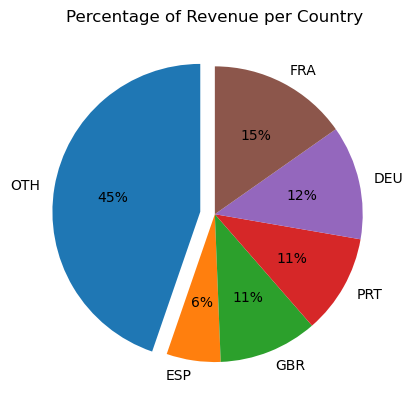

In [19]:
# 1. Pie Charts
fig, ax = plt.subplots()

ax.pie(
    pie_data['LodgingRevenue'],
    startangle=90,
    labels=pie_data.index,
    autopct='%.0f%%',
    explode=[.1, 0, 0, 0, 0, 0]
)
ax.set_title('Percentage of Revenue per Country');

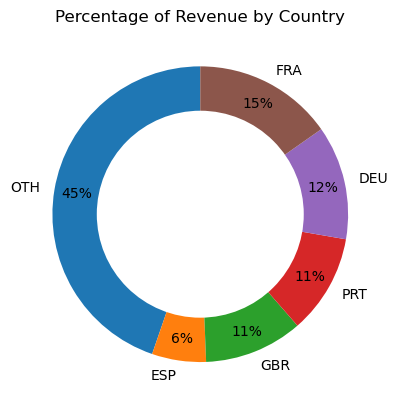

In [20]:
# 2. Donut Charts
fig, ax = plt.subplots()

ax.pie(
    pie_data['LodgingRevenue'],
    startangle=90,
    labels=pie_data.index,
    autopct='%.0f%%',
    pctdistance=.85
)

hole = plt.Circle((0, 0), .7, facecolor='white')
fig = plt.gcf()
fig.gca().add_artist(hole)

ax.set_title('Percentage of Revenue by Country');

## assignment 7
- Bubble Chart: average revenue per customer V.S. average nights stayed
    - average night revenue as size
- Histogram: customer ages in France, Germany

In [21]:
hotels = hotels.assign(
    TotalRevenue=hotels['LodgingRevenue'] + hotels['OtherRevenue'],
    RevenuePerNight=lambda x: x['TotalRevenue'] / x['RoomNights']
)

agg_hotels = (
    hotels
    .groupby('Nationality')
    .agg(
        total_revenue=('TotalRevenue', 'sum'),
        avg_revenue=('TotalRevenue', 'mean'),
        avg_age=('Age', 'mean'),
        avg_nights=('RoomNights', 'mean'),
        avg_nights_revenue=('RevenuePerNight', 'mean')
    )
)

In [22]:
agg_hotels

,total_revenue,avg_revenue,avg_age,avg_nights,avg_nights_revenue
Nationality,,,,,
ABW,2153.22,717.740000,42.666667,3.666667,204.421111
AGO,115174.49,632.826868,41.681319,3.461538,177.745487
AIA,1290.10,430.033333,25.666667,1.666667,232.737500
ALB,4267.88,328.298462,35.153846,2.846154,118.783788
AND,3760.25,537.178571,43.285714,2.000000,283.452381
...,...,...,...,...,...
WLF,137.20,68.600000,32.000000,0.500000,137.200000
WSM,342.00,342.000000,32.000000,2.000000,171.000000
YEM,0.00,0.000000,23.000000,0.000000,NaN


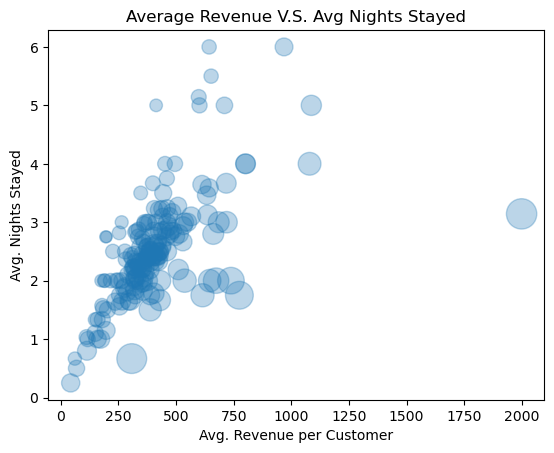

In [23]:
# 1. Bubble Chart
fig, ax = plt.subplots()

ax.scatter(
    agg_hotels['avg_revenue'],
    agg_hotels['avg_nights'],
    s=agg_hotels['avg_nights_revenue'],
    alpha=.3
)

ax.set_title('Average Revenue V.S. Avg Nights Stayed')
ax.set_ylabel('Avg. Nights Stayed')
ax.set_xlabel('Avg. Revenue per Customer');

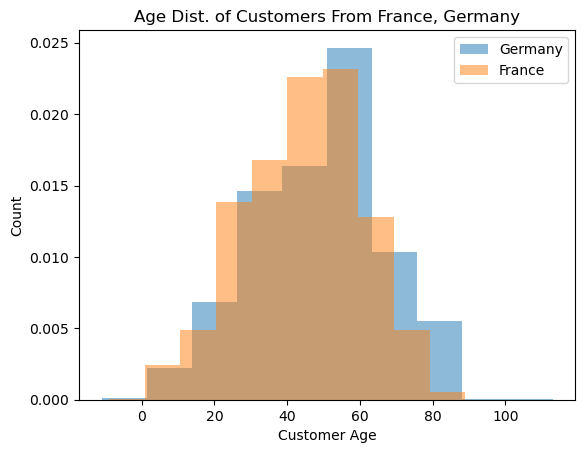

In [24]:
# 2-1. Histogram
# 히스토그램 결과를 보고 마케팅 플랜을 세울 수 있다.
fig, ax = plt.subplots()

ax.hist(hotels.loc[hotels['Nationality'] == 'DEU', 'Age'], density=True, alpha=.5)
ax.hist(hotels.loc[hotels['Nationality'] == 'FRA', 'Age'], density=True, alpha=.5)

ax.set_title('Age Dist. of Customers From France, Germany')
ax.set_xlabel('Customer Age')
ax.set_ylabel('Count')

ax.legend(['Germany', 'France']);

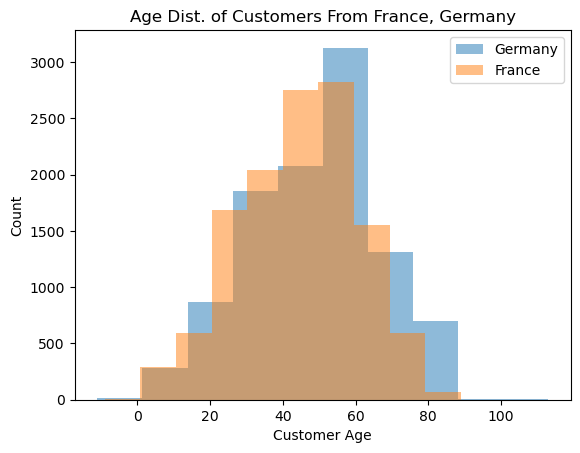

In [25]:
# 2-2. Histogram(density=True)
# 히스토그램 결과를 보고 마케팅 플랜을 세울 수 있다.
fig, ax = plt.subplots()

ax.hist(hotels.loc[hotels['Nationality'] == 'DEU', 'Age'], alpha=.5)
ax.hist(hotels.loc[hotels['Nationality'] == 'FRA', 'Age'], alpha=.5)

ax.set_title('Age Dist. of Customers From France, Germany')
ax.set_xlabel('Customer Age')
ax.set_ylabel('Count')

ax.legend(['Germany', 'France']);